In [1]:
import get_data as get
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
small_sample = pd.read_csv('./higgs/HIGGS_sample.csv')
small_sample = small_sample.sample(n=10000, random_state=42)
small_sample.to_csv('./higgs/HIGGS_small_sample.csv', index=False)

Explained variance ratio: [0.11648927 0.10080898] total: 0.21729824544778215


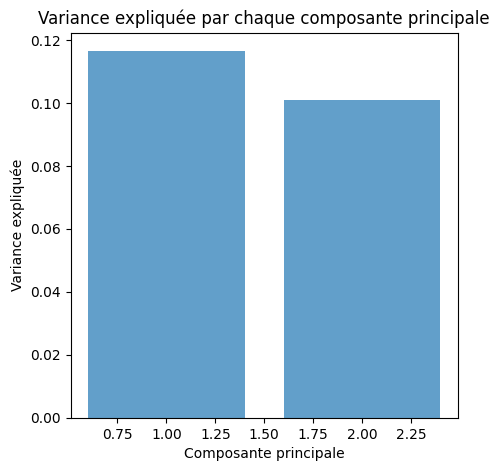

In [ ]:
# Charger les données échantillonnées
df = pd.read_csv('./higgs/HIGGS_small_sample.csv')
df.columns = ['label'] + [f'feature_{i}' for i in range(df.shape[1]-1)] 

# Filtrer pour ne garder que les signaux
df_signal = df[df['label'] == 1].drop(columns=['label'])

# Appliquer PCA pour réduire à 2 dimensions
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_signal)

# Afficher la variance expliquée par chaque composante principale dans un graphique
explained_variance = pca.explained_variance_ratio_
print("Explained variance ratio:", explained_variance, '| total:', sum(explained_variance))
plt.figure(figsize=(5, 5))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, align='center')
plt.xlabel('Composante principale')
plt.ylabel('Variance expliquée')
plt.title('Variance expliquée par chaque composante principale')
plt.show()
# Créer un DataFrame pour les résultats PCA
pca_df = pd.DataFrame(data=pca_result, columns=['PCA1', 'PCA2'])
